<a href="https://colab.research.google.com/github/Ahmed-Jebril/Covid19_EDA/blob/main/Covid19_project_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Covid19 data analysis


---



##1. Data Description

This data is from WHO official website and updated daily (https://covid19.who.int/data)

Data download link: https://covid19.who.int/WHO-COVID-19-global-data.csv


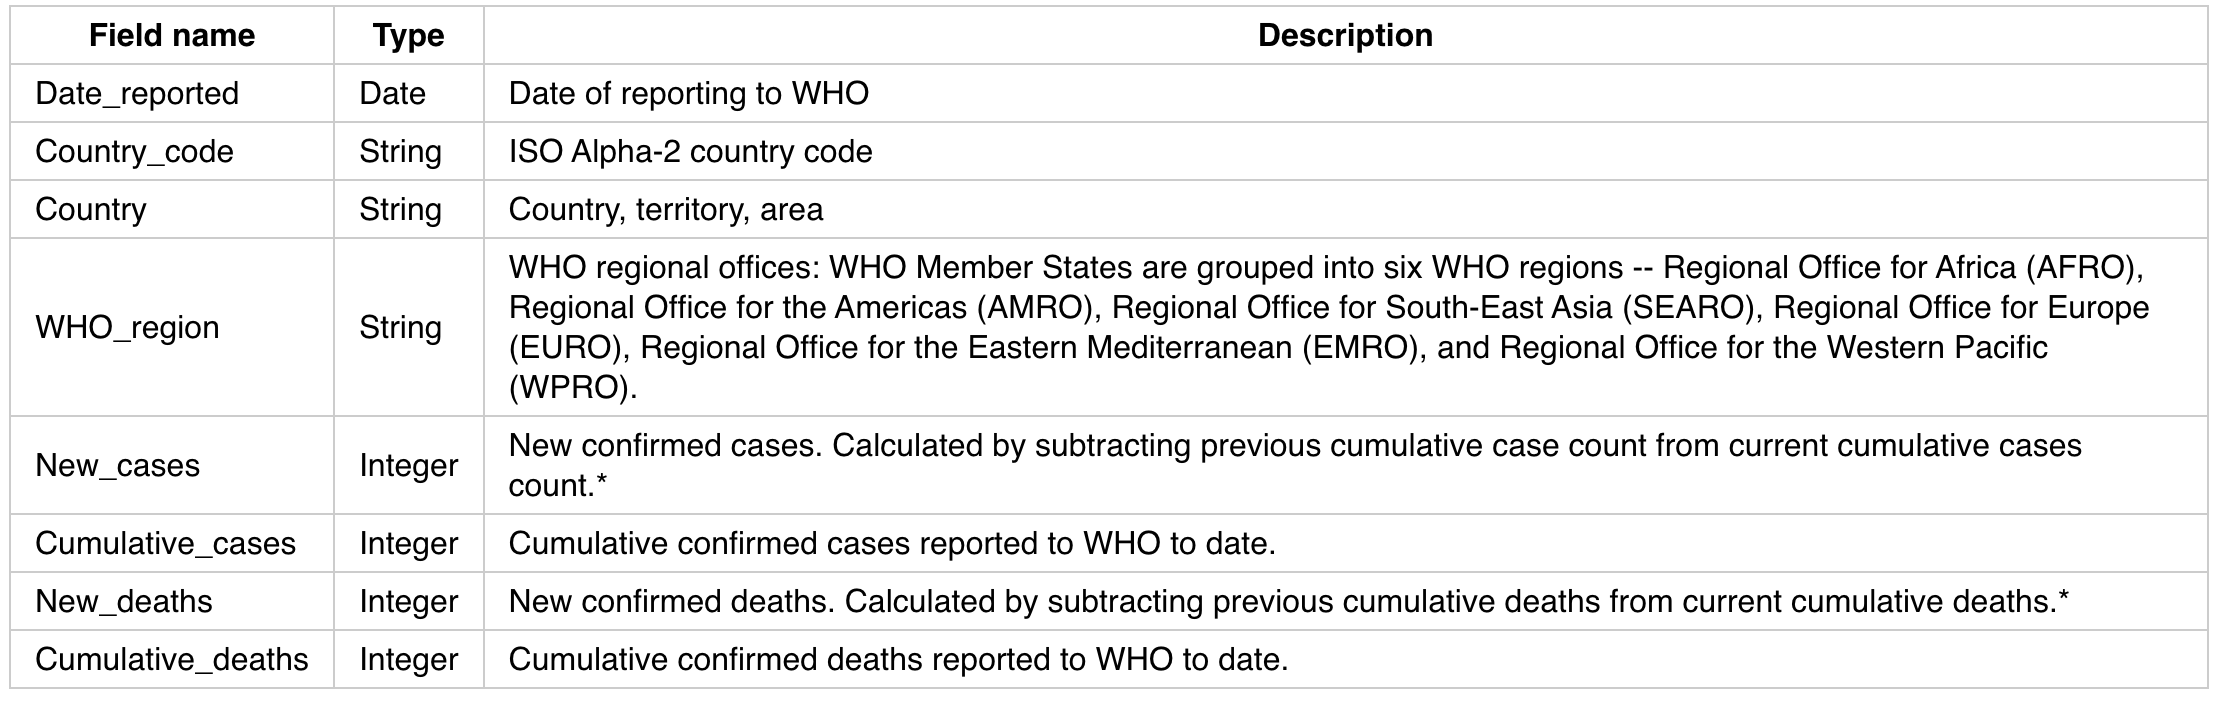

##2. Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
import plotly.express as px

##3. Data Wrangling

In [2]:
df = pd.read_csv('https://covid19.who.int/WHO-COVID-19-global-data.csv')
df.head()

Date_reported Country_code      Country WHO_region  New_cases  \
0    2020-01-03           AF  Afghanistan       EMRO          0   
1    2020-01-04           AF  Afghanistan       EMRO          0   
2    2020-01-05           AF  Afghanistan       EMRO          0   
3    2020-01-06           AF  Afghanistan       EMRO          0   
4    2020-01-07           AF  Afghanistan       EMRO          0   

   Cumulative_cases  New_deaths  Cumulative_deaths  
0                 0           0                  0  
1                 0           0                  0  
2                 0           0                  0  
3                 0           0                  0  
4                 0           0                  0

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265203 entries, 0 to 265202
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Date_reported      265203 non-null  object
 1   Country_code       264084 non-null  object
 2   Country            265203 non-null  object
 3   WHO_region         265203 non-null  object
 4   New_cases          265203 non-null  int64 
 5   Cumulative_cases   265203 non-null  int64 
 6   New_deaths         265203 non-null  int64 
 7   Cumulative_deaths  265203 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 16.2+ MB


In [4]:
df.duplicated().sum()

0

In [5]:
df.isnull().sum()

Date_reported           0
Country_code         1119
Country                 0
WHO_region              0
New_cases               0
Cumulative_cases        0
New_deaths              0
Cumulative_deaths       0
dtype: int64

In [6]:
df.describe()

New_cases  Cumulative_cases     New_deaths  Cumulative_deaths
count  2.652030e+05      2.652030e+05  265203.000000       2.652030e+05
mean   2.507034e+03      1.080608e+06      25.355098       1.553393e+04
std    1.608132e+04      5.057779e+06     145.658514       6.788746e+04
min   -1.311700e+04      0.000000e+00   -2437.000000       0.000000e+00
25%    0.000000e+00      9.810000e+02       0.000000       1.000000e+01
50%    1.500000e+01      2.366700e+04       0.000000       2.900000e+02
75%    4.160000e+02      2.977840e+05       4.000000       4.483000e+03
max    1.265520e+06      1.006515e+08   11447.000000       1.093540e+06

In [7]:
df.nunique()

Date_reported          1119
Country_code            236
Country                 237
WHO_region                7
New_cases             19220
Cumulative_cases     120783
New_deaths             1727
Cumulative_deaths     39676
dtype: int64

In [8]:
df.columns = df.columns.str.lower()

In [9]:
df['date_reported'] = pd.to_datetime(df['date_reported'])

In [10]:
df['date_reported'].dtype.type

numpy.datetime64

In [11]:
df.sample()

date_reported country_code     country who_region  new_cases  \
126688    2020-08-31           KG  Kyrgyzstan       EURO         78   

        cumulative_cases  new_deaths  cumulative_deaths  
126688             43898           0               1059

##4. Data Exploring

In [12]:
df.groupby('who_region').cumulative_cases.max()

who_region
AFRO       4053527
AMRO     100651473
EMRO       7563623
EURO      38392364
Other          764
SEARO     44682206
WPRO      32171700
Name: cumulative_cases, dtype: int64

<BarContainer object of 7 artists>

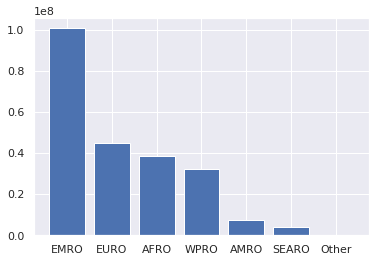

In [13]:
x=df['who_region'].unique()
y=df.groupby('who_region').cumulative_cases.max().sort_values(ascending=False)
plt.bar(x,y)

In [14]:
px.bar(df.groupby('who_region')['cumulative_cases'].max().sort_values(ascending=False),title= 'Cumulative Cases by region', width=800, height=400)

In [15]:
def cumulative_cases(who_region):
    fig = px.histogram(df[df.who_region == who_region], x='date_reported', y='cumulative_cases', 
                    title= f'Cumulative Cases Over Time for {who_region}', width=800, height=400)
    fig.show()

In [16]:
cumulative_cases('AFRO')

In [17]:
for region in df['who_region'].unique():
    fig = px.histogram(df[df.who_region == region], x='date_reported', y='cumulative_cases', 
                    title= f'Cumulative Cases Over Time for {region}', width=800, height=400)
    fig.show()

###Dividing the year data into seasons

In [18]:
df['month'] = df.date_reported.dt.month

In [19]:
def find_season(month):
        season = {
            12:'Winter', 1:'Winter', 2:'Winter',
            3:'Spring', 4:'Spring', 5:'Spring',
            6:'Summer', 7:'Summer', 8:'Summer',
            9:'Autumn', 10:'Autumn', 11:'Autumn'}
        return season.get(month)

In [20]:
season_list = []
for month in df['month']:
    season = find_season(month)
    season_list.append(season)
    
df['season'] = season_list

In [21]:
df.sample()

date_reported country_code country who_region  new_cases  \
81099    2021-06-17           FR  France       EURO       2865   

       cumulative_cases  new_deaths  cumulative_deaths  month  season  
81099           5640981          44             109660      6  Summer

###Estimating total deaths & total cases per season

In [22]:
df.groupby('season').new_deaths.sum()

season
Autumn    1467352
Spring    1754809
Summer    1558748
Winter    1943339
Name: new_deaths, dtype: int64

In [23]:
fig = px.bar(df.groupby('season')['new_deaths'].sum().sort_values(ascending=False),title= 'Total deaths per season', width=800, height=400)
fig.update(layout_showlegend=False)
fig.show()

In [24]:
df.groupby('season').new_cases.sum()

season
Autumn    122496088
Spring    154739881
Summer    139217625
Winter    248419429
Name: new_cases, dtype: int64

In [25]:
fig = px.bar(df.groupby('season')['new_cases'].sum().sort_values(ascending=False),title= 'Total cases per season', width=800, height=400)
fig.update(layout_showlegend=False)
fig.show()

###Estimating total deaths & total cases per season in each region

In [26]:
data = df[df['who_region'] == 'EMRO'].groupby('country')['cumulative_deaths'].max().sort_values(ascending=False)
fig = px.bar(data, title='Cumulative Deaths by Country in EMRO Region', width=800, height=800)
fig.update(layout_showlegend=False)
fig.show()

In [27]:
df.groupby(['who_region', 'season'])['new_deaths'].sum()

who_region  season
AFRO        Autumn     27329
            Spring     20764
            Summer     71772
            Winter     55318
AMRO        Autumn    551313
            Spring    759913
            Summer    760373
            Winter    837068
EMRO        Autumn     96617
            Spring     79282
            Summer    107331
            Winter     66048
EURO        Autumn    552110
            Spring    593664
            Summer    227632
            Winter    803704
Other       Autumn         0
            Spring         7
            Summer         0
            Winter         6
SEARO       Autumn    156735
            Spring    231277
            Summer    315351
            Winter    100252
WPRO        Autumn     83248
            Spring     69902
            Summer     76289
            Winter     80943
Name: new_deaths, dtype: int64

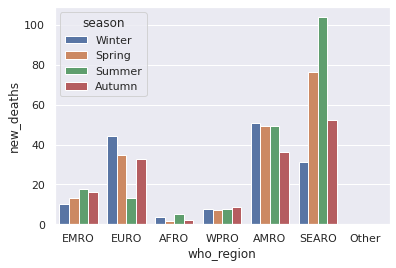

In [28]:
sns.barplot(x='who_region', y='new_deaths', hue= 'season', data=df, ci=None);

## Insights


*   Cases number is the highest during Winter then Spring

*   Total deaths hits nearly 2 million pearson during Winter as it's highest record


